## Extracción Datos

### Importe Librerías

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Leer y Preprocesar CSVs

In [203]:
caracteristicas = pd.read_csv("/Users/santiospina/Documents/6 Semestre/Ingeniería de Mercados/Entrega 1/GEIH23/CSV_Junio_23/características.CSV", 
                 sep=";", 
                 encoding='latin-1')

datosHogar = pd.read_csv("/Users/santiospina/Documents/6 Semestre/Ingeniería de Mercados/Entrega 1/GEIH23/CSV_Junio_23/datosHogar.CSV", 
                 sep=";", 
                 encoding='latin-1')

migracion = pd.read_csv("/Users/santiospina/Documents/6 Semestre/Ingeniería de Mercados/Entrega 1/GEIH23/CSV_Junio_23/migracion.CSV", 
                 sep=";", 
                 encoding='latin-1')

### Formato y Visualización 

In [204]:
# Renombrar columna P4030S1A1 como 'estrato' dado el diccionario de variables

datosHogar.rename(columns={'P4030S1A1':'estrato'}, inplace=True)

In [205]:
# drop nan values en la columna estrato

datosHogar = datosHogar.dropna(subset=['estrato'])

In [206]:
datosHogar['estrato'][datosHogar['estrato']==9] = 7

In [207]:
datosHogar.rename(columns={'P5222S1':'cuentaCorriente'}, inplace=True)
datosHogar.rename(columns={'P5222S2':'cuentaAhorros'}, inplace=True)
datosHogar.rename(columns={'P5222S3':'CDT'}, inplace=True)
datosHogar.rename(columns={'P5222S4':'prestamoVivienda'}, inplace=True)
datosHogar.rename(columns={'P5222S5':'prestamoVehiculo'}, inplace=True)
datosHogar.rename(columns={'P5222S6':'prestamoLibreInversion'}, inplace=True)
datosHogar.rename(columns={'P5222S7':'tarjetaCredito'}, inplace=True)
datosHogar.rename(columns={'P5222S9':'ningunServicioFinanciero'}, inplace=True)
datosHogar.rename(columns={'P5222S8':'noSabeServicioFinanciero'}, inplace=True)

In [208]:
financial_columns = [
    'cuentaCorriente',
    'cuentaAhorros',
    'CDT',
    'prestamoVivienda',
    'prestamoVehiculo',
    'prestamoLibreInversion',
    'tarjetaCredito',
    'ningunServicioFinanciero',
    'noSabeServicioFinanciero'
]

financial_counts_by_estrato = datosHogar.groupby('estrato')[financial_columns].sum()

display(financial_counts_by_estrato)


,cuentaCorriente,cuentaAhorros,CDT,prestamoVivienda,prestamoVehiculo,prestamoLibreInversion,tarjetaCredito,ningunServicioFinanciero,noSabeServicioFinanciero
estrato,,,,,,,,,
0.0,0.0,81.0,0.0,1.0,0.0,6.0,1.0,278.0,0.0
1.0,73.0,4253.0,6.0,67.0,19.0,309.0,230.0,4839.0,121.0
2.0,71.0,5004.0,11.0,187.0,41.0,452.0,535.0,2346.0,148.0
3.0,67.0,3576.0,49.0,218.0,66.0,322.0,723.0,708.0,102.0
4.0,50.0,1481.0,40.0,127.0,51.0,190.0,497.0,88.0,24.0
5.0,32.0,491.0,20.0,51.0,24.0,72.0,220.0,17.0,5.0
6.0,24.0,266.0,10.0,25.0,10.0,27.0,158.0,5.0,0.0
7.0,0.0,10.0,0.0,1.0,0.0,3.0,1.0,65.0,0.0


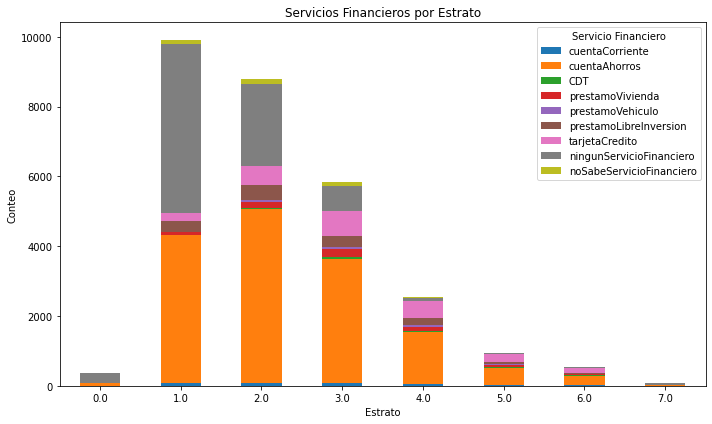

In [209]:
financial_counts_by_estrato.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Servicios Financieros por Estrato')
plt.xlabel('Estrato')
plt.ylabel('Conteo')
plt.legend(title='Servicio Financiero')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [210]:
cont_estrato = datosHogar['estrato'].value_counts()

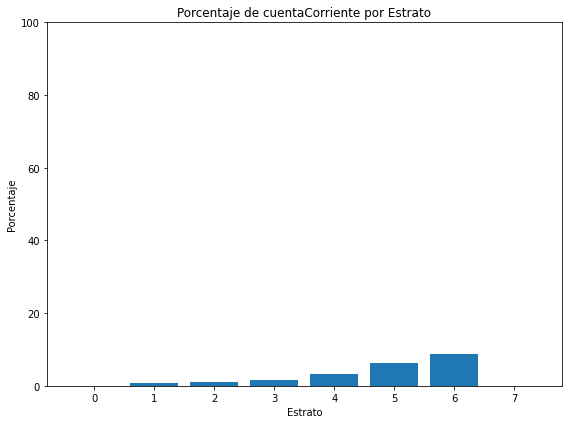

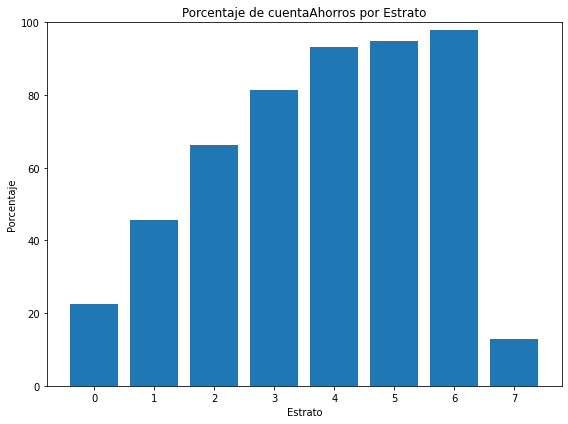

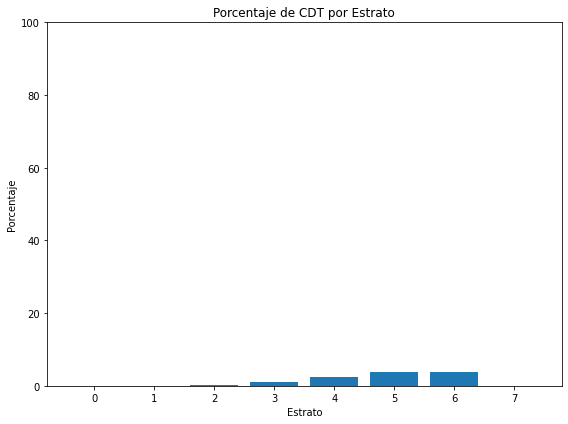

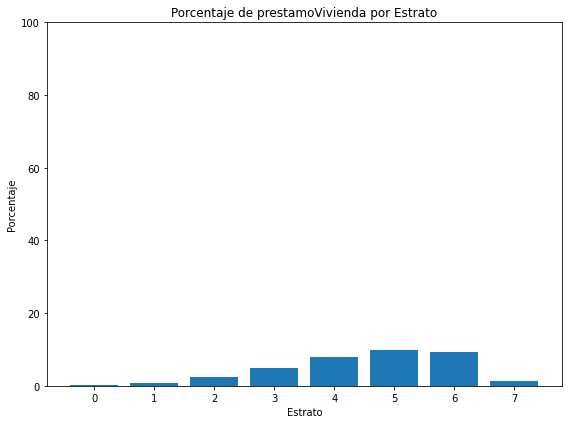

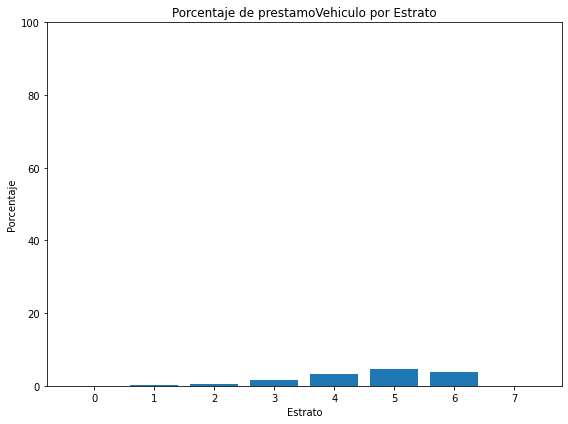

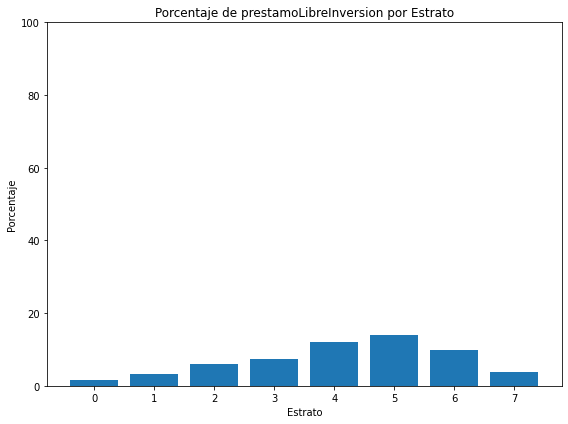

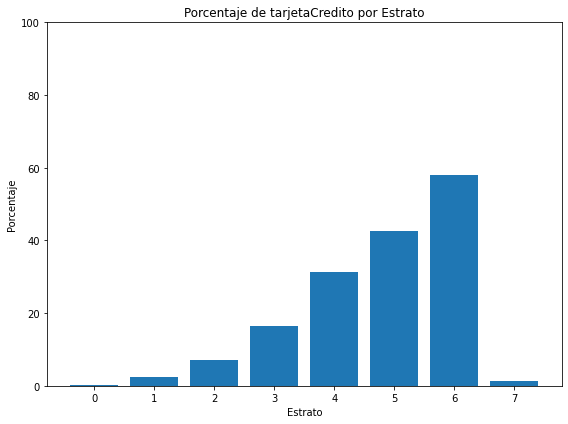

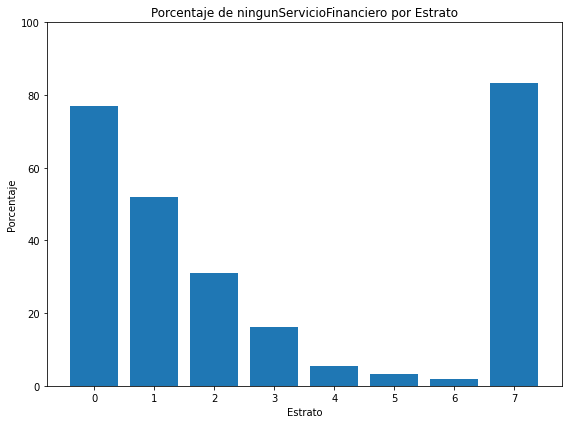

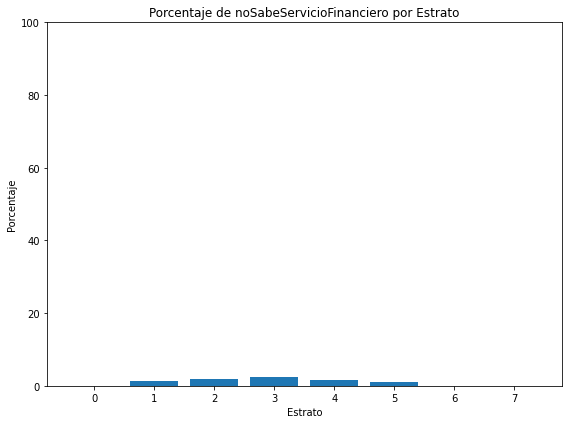

In [211]:
servicio_financiero = [
    'cuentaCorriente',
    'cuentaAhorros',
    'CDT',
    'prestamoVivienda',
    'prestamoVehiculo',
    'prestamoLibreInversion',
    'tarjetaCredito',
    'ningunServicioFinanciero',
    'noSabeServicioFinanciero'
]

# Calculate percentages for each financial service within each "estrato"
financial_percentages_by_estrato = financial_counts_by_estrato.div(cont_estrato, axis=0) * 100

# Create a  bar plot for each financial service
for servicio in servicio_financiero:
    plt.figure(figsize=(8, 6))
    plt.bar(financial_percentages_by_estrato.index.astype(int), financial_percentages_by_estrato[servicio])
    plt.title(f'Porcentaje de {servicio} por Estrato')
    plt.xlabel('Estrato')
    plt.ylabel('Porcentaje')
    plt.ylim(0, 100) 
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


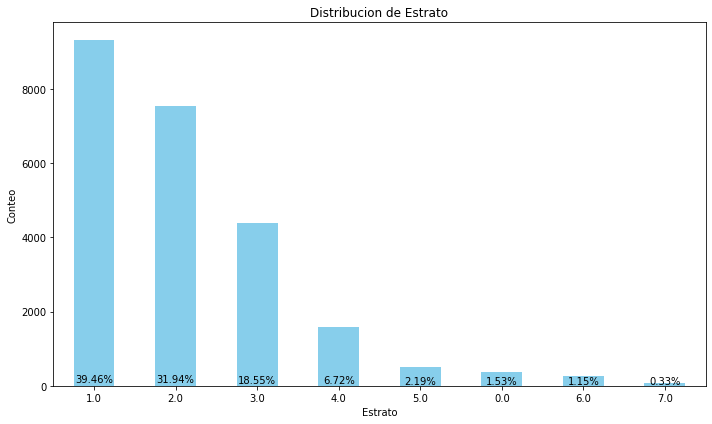

In [212]:
cont_estrato = datosHogar['estrato'].value_counts()

# Calcular porcentajes
total = estrato_counts.sum()
percentages = (cont_estrato / total) * 100

plt.figure(figsize=(10, 6))
bars = cont_estrato.plot(kind='bar', color='skyblue')
plt.title('Distribucion de Estrato')
plt.xlabel('Estrato')
plt.ylabel('Conteo')

for index, value in enumerate(percentages):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()


In [213]:
cont_estrato = cont_estrato.drop([0, 7])

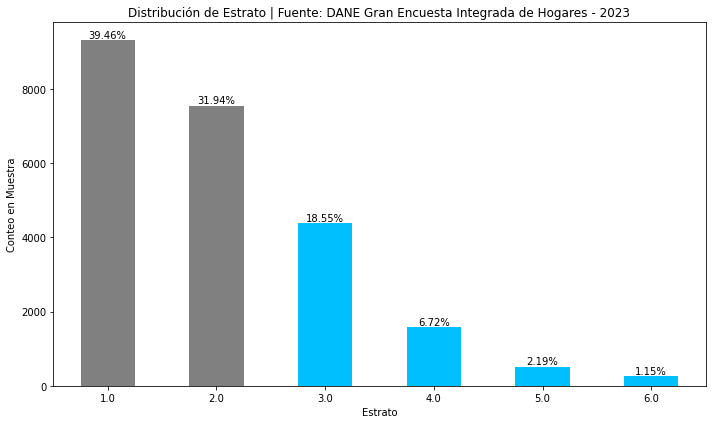

In [214]:
colors = ['gray', 'gray', 'deepskyblue', 'deepskyblue', 'deepskyblue', 'deepskyblue' ]
plt.figure(figsize=(10, 6))
bars = cont_estrato.plot(kind='bar', color=colors)
plt.title('Distribución de Estrato | Fuente: DANE Gran Encuesta Integrada de Hogares - 2023')

plt.xlabel('Estrato')
plt.ylabel('Conteo en Muestra')

percentages = (cont_estrato / cont_estrato.sum()) * 100
for index, value in enumerate(cont_estrato):
    plt.text(index, value, f'{percentages.iloc[index]:.2f}%', ha='center', va='bottom')


plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()